# Computational Methods for Optimization

## Nuno M. Rodrigues, 2021/2022


### TSP and Simulated Anealling

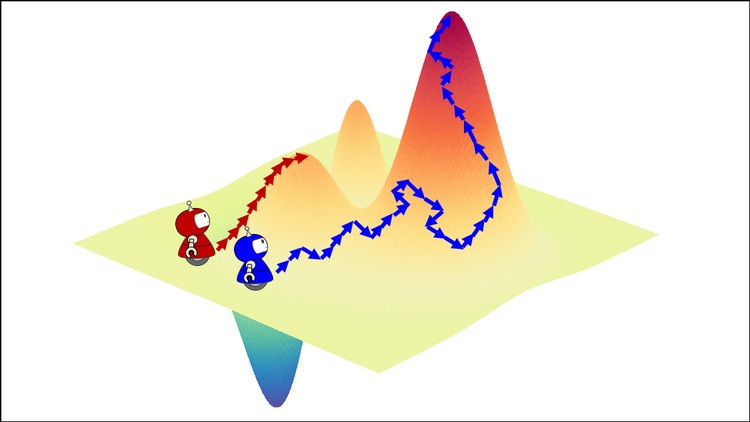

#### TSP

The traveling talesperson problem (TSP) is an np-hard optimization problem that asks the following question: "Given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city exactly once and returns to the origin city?"  
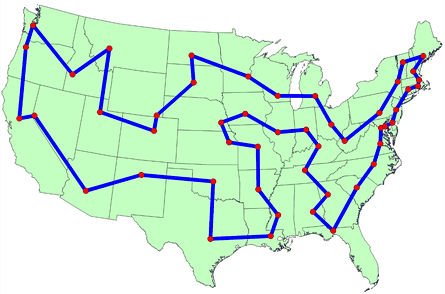

In the most simple versions of this problem, you only need to worry about the distance between each city, and no aditional costs, although in more advanced versions there are additional variables such as maximizing profit or ensuring each city is visited in a certain time window.

Usually, for the simple versions, you will get a set of cooridnates for the cities and a distance metric. You will need to use that distance metric to calculate the distances between each city and store them as you see fit (*e.g* a 2x2 matrix or a dictionary).

The solutions generated by the optimization algorithms represent a cycle, and their fitness value indicates the total length of the discovered path that visits all cities.

### Distance Metrics

There are 4 main distance metrics used in these kinds of problems:

* **Euclidian Distance**
The Euclidian distance is the shortest path between 2 points in a straight line.  
$d(x,y) = \sqrt{(y_1 - x_1)^2 + (y_2 - x_2)^2 +\ ...\ +\ (y_n-x_n)}$

* **Manhattan Distance**  
The Manhattan distance is the distance between 2 points in a $N$ dimensional vector space, which in 2D is an horizontal and vertical distance. This distance is also called the L1 metric/norm.  
$d(x,y)=|x_1 - y_1| + |x_2 - y_2| +\ ...\ +\ |x_n-y_n|$

* **Minkowski Distance**  
The Minkowski distance is the generalization of both the Euclidean and Manhattan distances for real-value vector spaces.  
$d(x,y) = \sqrt[p]{{(x_1-y_1)}^p\ +\ {(x_2-y_2)}^p\ +\ ...\ +\ {(x_n-y_n)}^p}$  
The value of $p$ is set by experimentation, but is commonly 2, 3 or 4 for most problems.

* **Hamming Distance**  
The Hamming distance is a metric to compare binary strings of equal length, and is the number of positions that have differing bits.  
The easiest way to calculate it is by applying a XOR ($\oplus$) operation to two strings, and counting the number of 1's.

There are some other very interesting and solid distance metrics, such as the Mahalanobis distance, used for clusters, but we will not go over them in this notebook.

Regarding the prefered distance metric, between euclidian and manhattan, as the dimensionality increases so does the preference for manhattan. However, in a 2D space, there is no significative difference.


#### Example

Let's us then see an example of these metrics, mainly the euclidian and manhattan distances.

Assume the following cities and their respective coordinates in a 2D space, represented by a list of tupples ($x$,$y$) 

In [31]:
data = [
        (288, 149), (288, 129), (270, 133), (256, 141), (256, 157), (246, 157),
        (236, 169), (228, 169), (228, 161), (220, 169), (212, 169), (204, 169),
        (196, 169), (188, 169), (196, 161), (188, 145), (172, 145), (164, 145),
        (156, 145), (148, 145), (140, 145), (148, 169), (164, 169), (172, 169),
        (156, 169), (140, 169), (132, 169), (124, 169), (116, 161), (104, 153),
        (104, 161), (104, 169), (90, 165), (80, 157), (64, 157), (64, 165),
        (56, 169), (56, 161), (56, 153), (56, 145), (56, 137), (56, 129),
        (56, 121), (40, 121), (40, 129), (40, 137), (40, 145), (40, 153),
        (40, 161), (40, 169), (32, 169), (32, 161), (32, 153), (32, 145),
        (32, 137), (32, 129), (32, 121), (32, 113), (40, 113), (56, 113),
        (56, 105), (48, 99), (40, 99), (32, 97), (32, 89), (24, 89),
        (16, 97), (16, 109), (8, 109), (8, 97), (8, 89), (8, 81)
]

We can also plot the coordinates in a scatter plot to view their distribution and location.

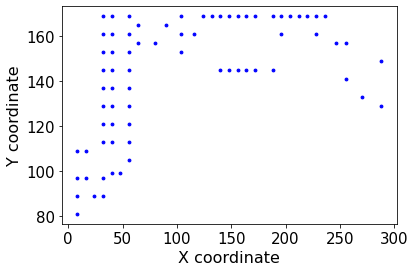

In [32]:
plt.figure()
plt.scatter(*zip(*data), color='blue', s=8)
plt.xlabel('X coordinate', fontsize=16)
plt.ylabel('Y coordinate', fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

We can define two functions that compute the distance between two cities, one for the euclidian distance, and one for the manhattan distance.  
For simplicity, we will cast the result to be an Int.

In [26]:
def euclidian(p1,p2):
    return int(math.sqrt((p2[0]-p1[0])**2 + (p2[1]-p1[1])**2))

def manhattan(p1,p2):
    return int(math.fabs(p1[0]-p2[0]) + math.fabs(p1[1]-p2[1]))

Having defined the distance metrics, we can now calculate the distance matrix, containing the distances between all cities. Remember, the matrix is symmetric.

**Note**  
The `end=' '` command in the prints is used to print the values in the same line, instead of one print per line.

In [29]:
distance_euc = []
for city in data:
    distances = [euclidian(city,data[i]) for i in range(len(data))]
    distance_euc.append(distances)
        
for row in distance_euc:
    for distance in row:
        print(distance, end = ' ')
    print()
    

0 20 24 32 32 42 55 63 61 70 78 86 94 101 92 100 116 124 132 140 148 141 125 117 133 149 157 165 172 184 184 185 198 208 224 224 232 232 232 232 232 232 233 249 248 248 248 248 248 248 256 256 256 256 256 256 257 258 250 234 236 245 252 261 262 270 276 274 282 284 286 288 
20 0 18 34 42 50 65 72 68 78 85 93 100 107 97 101 117 125 132 140 148 145 130 122 137 153 161 168 174 185 186 188 201 209 225 226 235 234 233 232 232 232 232 248 248 248 248 249 250 251 259 257 257 256 256 256 256 256 248 232 233 241 249 257 259 267 273 272 280 281 282 284 
24 18 0 16 27 33 49 55 50 61 68 75 82 89 79 82 98 106 114 122 130 127 111 104 119 134 142 150 156 167 168 169 182 191 207 208 217 215 214 214 214 214 214 230 230 230 230 230 231 232 240 239 238 238 238 238 238 238 230 214 215 224 232 240 242 249 256 255 263 264 265 267 
32 34 16 0 16 18 34 39 34 45 52 59 66 73 63 68 84 92 100 108 116 111 96 88 103 119 127 134 141 152 153 154 167 176 192 193 201 200 200 200 200 200 200 216 216 216 216 216 216 217 2

In [30]:
distance_man = []
for city in data:
    distances = [manhattan(city,data[i]) for i in range(len(data))]
    distance_man.append(distances)
        
for row in distance_man:
    for distance in row:
        print(distance, end = ' ')
    print()
    

0 20 34 40 40 50 72 80 72 88 96 104 112 120 104 104 120 128 136 144 152 160 144 136 152 168 176 184 184 188 196 204 214 216 232 240 252 244 236 236 244 252 260 276 268 260 252 252 260 268 276 268 260 260 268 276 284 292 284 268 276 290 298 308 316 324 324 312 320 332 340 348 
20 0 22 44 60 70 92 100 92 108 116 124 132 140 124 116 132 140 148 156 164 180 164 156 172 188 196 204 204 208 216 224 234 236 252 260 272 264 256 248 240 232 240 256 248 256 264 272 280 288 296 288 280 272 264 256 264 272 264 248 256 270 278 288 296 304 304 292 300 312 320 328 
34 22 0 22 38 48 70 78 70 86 94 102 110 118 102 94 110 118 126 134 142 158 142 134 150 166 174 182 182 186 194 202 212 214 230 238 250 242 234 226 218 218 226 242 234 234 242 250 258 266 274 266 258 250 242 242 250 258 250 234 242 256 264 274 282 290 290 278 286 298 306 314 
40 44 22 0 16 26 48 56 48 64 72 80 88 96 80 72 88 96 104 112 120 136 120 112 128 144 152 160 160 164 172 180 190 192 208 216 228 220 212 204 204 212 220 236 228 220 22

## Simulated Annealing

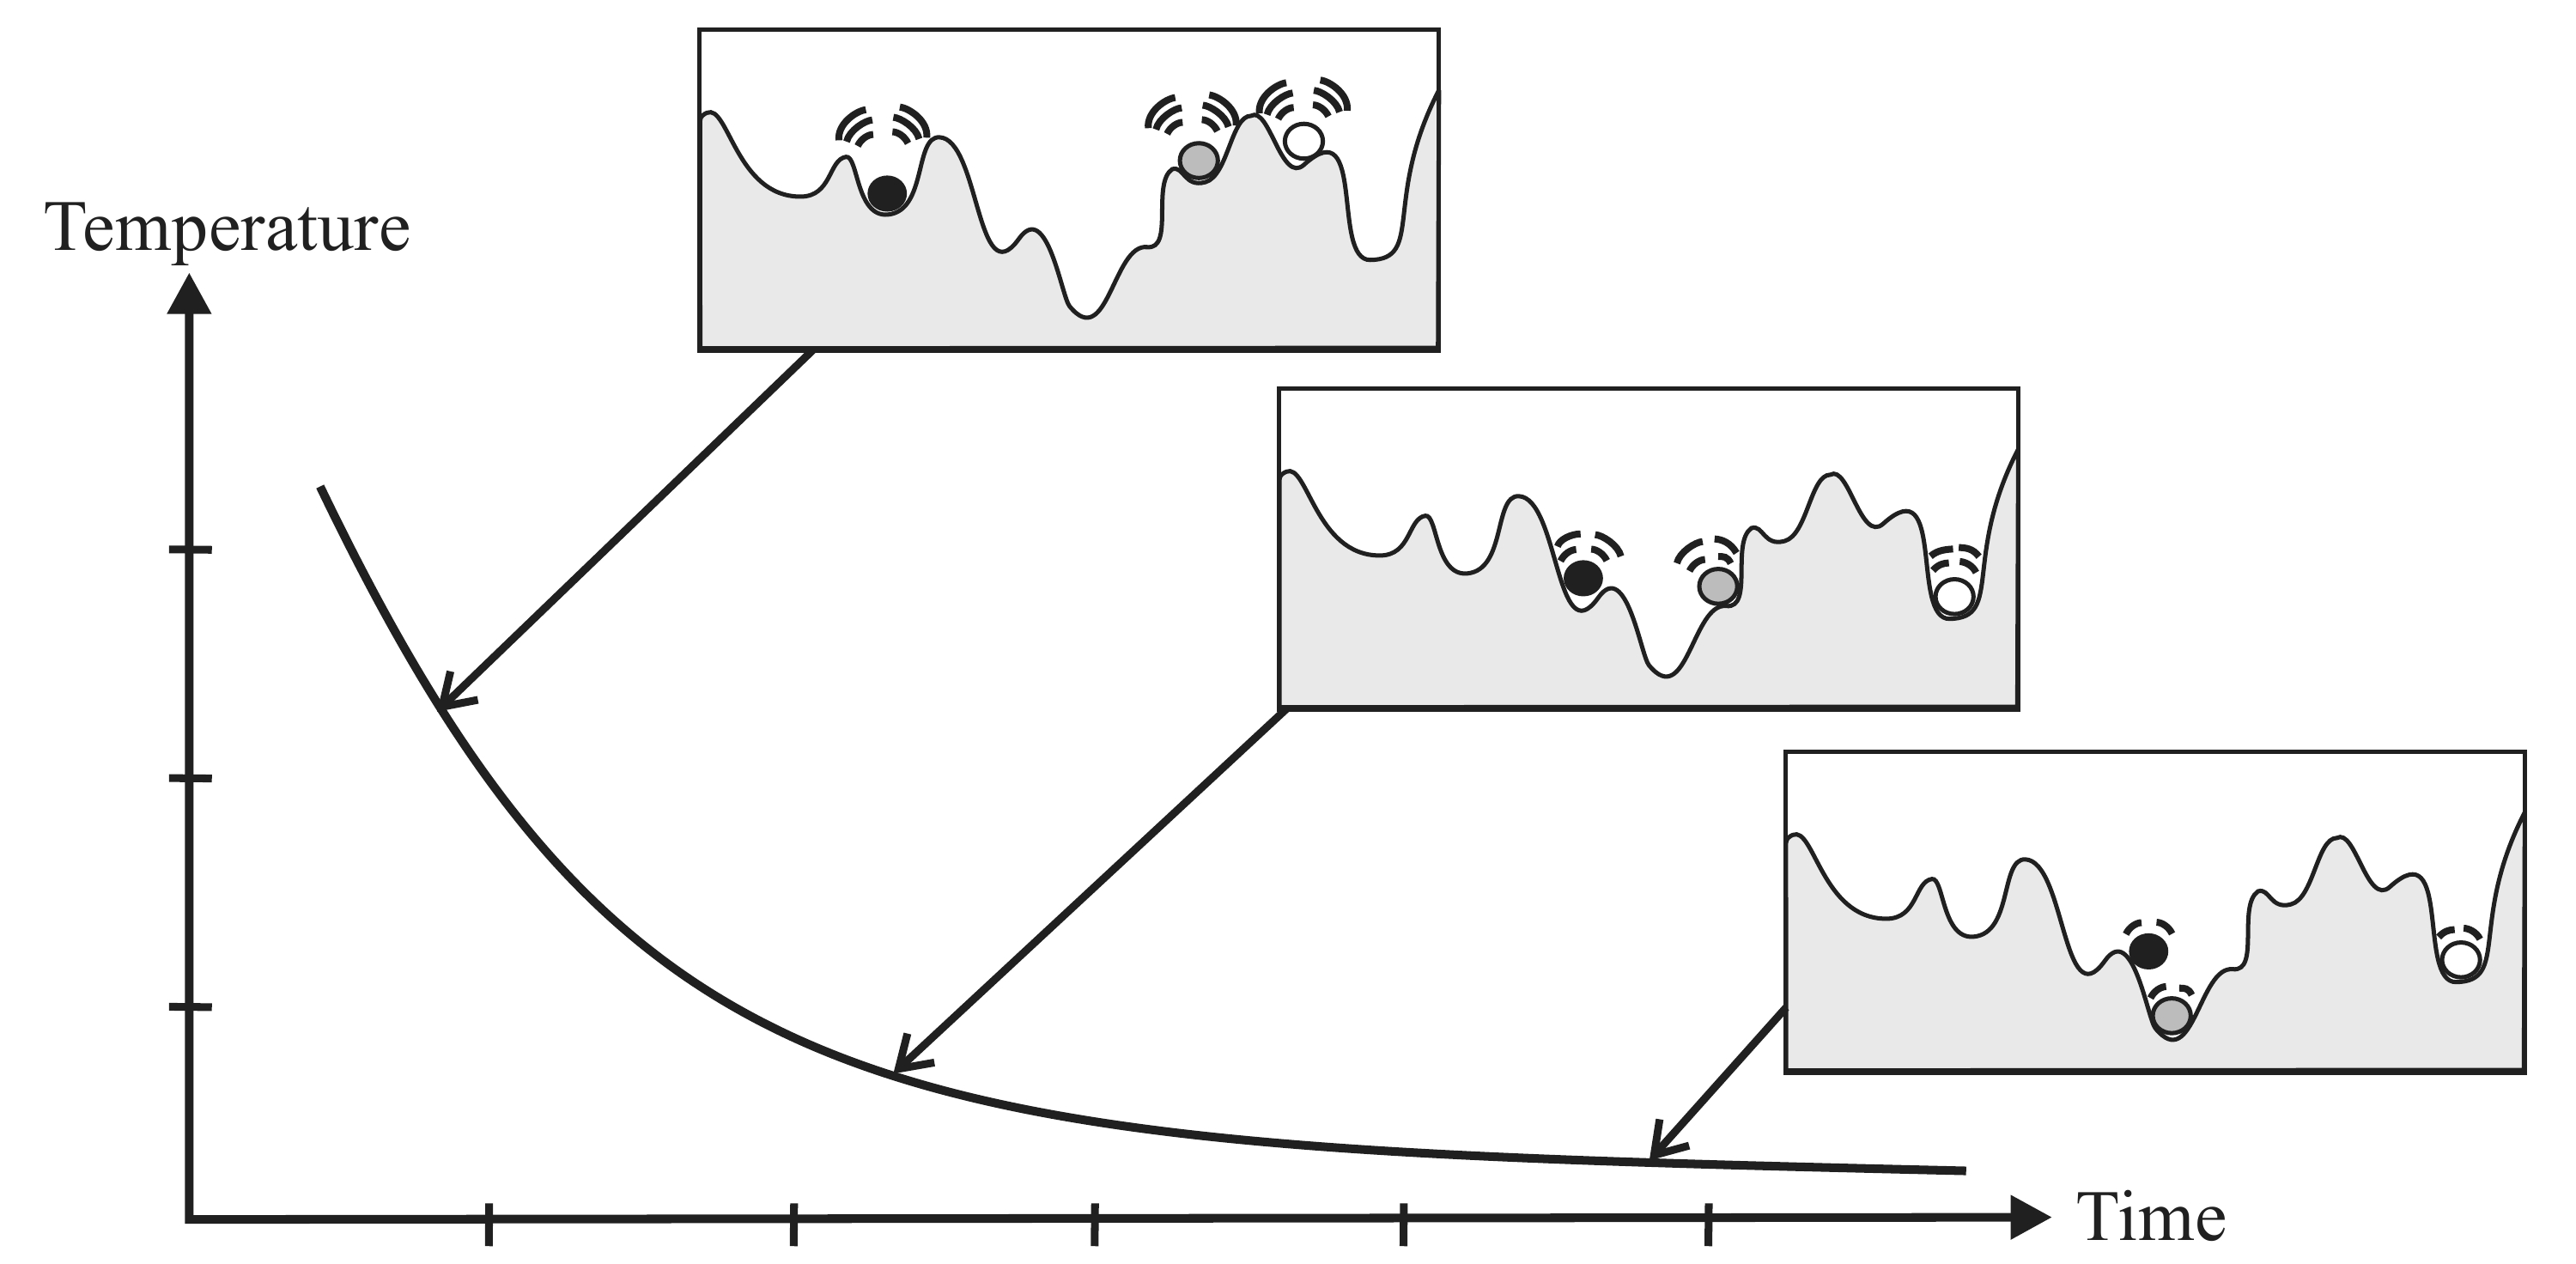

##### "Annealing is a heat treatment process that changes the physical and sometimes also the chemical properties of a material to increase ductility and reduce the hardness to make it more workable."

In this notebook we will cover the simmulated annealing (SA) optimization algorithm.  
Simmulated annealing is a bio-inspired algorithms and can be seen a extension of Hill Climber, which adds exploration capability to the algorithm.

The annealing process can be summarized as follows:

* It starts with an object in solid state $i$, with energy $E_i$.
* The chemical bonds of that object are modified, obtaining and new object with solid state $j$ and energy $E_j$.
* Then, the new state of the material, either $i$ or $j$ is probabilistically accepted, based in their energy values of $E_i$ and $E_j$, and the process repeats until the material sabilizes in a given state.


Now, utilizing this analogy, we can model our simmulated annealing version of the process:

* It starts with a random initial solution $i$, with fitness $f(i)$
* We generate a neighbor solution, $j$, with fitness $f(j)$.
* Through a probabilistic acceptance mechanism based on the fitness values $f(i)$ and $f(j)$, we selected either $i$ or $j$ to be the next solution, and repeat from the previous step.

### Probabilistic acceptance

The probabilistic of acceptance of the SA algorithm is called Metropolis Hastings, and it belongs to the family of Markov Chain Monte Carlo (MCMC) algorithms.

Given an optimization problem $(S,f)$,a  current solution $i \in S$ and a new candidate solution $j \in S$, probability of acceptance can be defined as:

$P( \text{accept } j) = \begin{cases} 1 \quad \quad \quad \quad \text{ if } f(j) \text{ better or equal than } f(i) \\ e^{\frac{-|f(j)-f(i)|}{c}} \quad \text{otherwise } \end{cases}\\ $

For minimization it becomes:

$P( \text{accept } j) = \begin{cases} 1 \quad \quad \quad \quad \text{ if } f(j) \text{ better or equal than } f(i) \\ e^{\frac{f(i)-f(j)}{c}} \quad \text{otherwise } \end{cases}\\ $

Then, we sample a random number between $[0,1]$, called $\sigma$, and if $P > \sigma$ then the solution is accepted.

It is the probabilistic acceptance mechanism that allows SA to **explore** the landscape. So, if the algorithm is initialized in a difficult area of the search space, it is allowed to freely explore it's surroundings, instead of ending on the first local optima like the Hill Climber.

Here, $c$ is called the control / temperature parameter.  
The temperature should start with a high value, and steadily decrease it's value towards zero but necer reaching zero, mimicking the metal cooling down.

You can notice that, as the value of $c$ starts decreasing, so does the chance of accepting solutions worse than the current one.  
Again, with the metalurgy comparisson, when the metal is red hot, its easier to change its shape so one can explore the different possibilities, but as the temprature decreases and the metal cools down, than only fine adjustments that improve the current shape are able to be performed.

### Cooling Schedule

As long as it tend torwards $0$, without ever reaching it, there are no other restrictions in the way the temperature is updated.
A good article that covers a decent amount of common strategies can be found [here](http://www.scielo.org.mx/pdf/cys/v21n3/1405-5546-cys-21-03-00493.pdf).

For the sake of simplicity, in this class we will use the Logarithmic Cooling Schedule, which can be defined as follows:

$c_t = \frac{c_0}{1+log(1+t)}$
  
The main problem with this cooling schedule is that it is very slow.

### Loops and termination

The SA is characterized by having 2 distinct loops.  

**External loop**

There is an external loop, which begins and terminates the algorithm, as well as applies the cooling schedule.  
There are 2 mains ways to terminate the execution of SA, depending if the global optimal solution is known or not.  
If the global optimum solution is known, we can stop the algorithm when a 'satisfactory' solution is found, which means we found a solution with fitness close to the fitness of the global optimum.  
Or, when that information is not known, we limit the execution of the SA by using a threshold of the number of iterations defined at the begining.

**Internal loop**

The internal loop allows a certain degree of exploration at each temperature values.  

In the theoretical classes you mention that the variable $L$ that controls the number of iterations of the internal loop can be either changed at each iteration of the external loop, or defined at the start of the algorithm.  
In this example, for the sake of simplicity, we will define the value of $L$ at the begining of the algorithm.


### Simulated Annealing Loop


Having deffined all singular steps in the SA, we can now make a more complete and geenral definition of the full algorithm:

1. Initialize the initial temperature value $c$, as well as a threshold of iterations of the internal loop $L$, and a variable $n$ regarding the limit of iterations of the external loop.  
2. Generate a random initial solution $i$, and calculate it's fitness value $f(i)$
3. Generate a random neighbor $j \in S$, taken from $N(i)$, and calculate it's fitness value $f(j)$.  
4. If $f(j)$ better or equal than $f(i)$ then:  
    4.1 $j$ becomes the new current solution  
    4.2 Else, we compute the acceptance probability $P$ and compare it to $Random(0,1)$.  
    4.2.1 If $P > Random(0,1)$ then $j$ becomes the new current solution  
    4.2.2 Else, $j$ is rejected and $i$ continues to the current solution  
5. Repeat step 3 intil $L$ is reached  
6. Update the temperature value $c$ following a cooling schedule  
7. Go back to step 3 and repeat until $n$ is reached  

In [11]:
from game import Game
from card_deck import CardDeck
from bank import Bank
import math
from multiprocessing import Pool
import os
from typing import List
from game_state import GameState
from Players.mcts_player import MCTSPlayer
from Players.player import Player
from playing_board import PlayingBoard
from Players.random_player import RandomPlayer
import random
import numpy as np


In [14]:

class sol:
    def __init__(self, c_value, iterations):
        self.c_value = c_value
        self.iterations = iterations
        self.results = []
        self.fitness = 0
        # self.game_state = self.create_game_state()

    def run_game_threaded(self, param):
        c, iterations = param
        NUMBER_OF_PLAYERS = 5
        mode = 0
        card_deck = CardDeck(NUMBER_OF_PLAYERS, True)
        bank = Bank(NUMBER_OF_PLAYERS)
        playing_board = PlayingBoard(card_deck)
        players:List[Player] = []
        for i in range(NUMBER_OF_PLAYERS):
            players.append(RandomPlayer(i, None, bank))
            # print(f"Player {i} added")

        position = random.randint(0, NUMBER_OF_PLAYERS-1)
        players[position] = MCTSPlayer(position, None, bank, c_value=c, depth=iterations)

        game_state = GameState(playing_board=playing_board,
                            players=players,
                            card_deck=card_deck,
                            bank=bank, 
                            turn=0,
                            slot_index=0,
                            slots=[],
                            mode=mode)
        SA.give_players_crystals(game_state.players)

        game_simulation = Game(game_state, True)

        result = game_simulation.run_game()
        mcts = []
        for player in game_simulation.players:
            if player.player_type == 'MCTS':
                mcts.append(player.index)
        result = result + [':'] + mcts
        return result


    def get_fitness(self):
        c = self.c_value
        iterations = self.iterations
        mcts_scores = []


        num_processes = os.cpu_count()
        with Pool(num_processes) as pool:
            # Create a list of tuples for each task
            parameters = (c, iterations)
            tasks = [(parameters) for i in range(10)]
            
            # Use pool.map to process tasks
            results = pool.map(self.run_game_threaded, tasks)

        string_res = [' '.join(res) for res in results]
        for result in string_res:
            scores = [int(score) for score in result.split(':')[0].split(' ') if score != '']
            mcts_indexes = [int(number) for number in  result.split(':')[1].split(' ') if number != '']
            for idx in mcts_indexes:
                mcts_scores.append(scores[idx])

        self.results.append(results)
        self.fitness = sum(mcts_scores)/len(mcts_scores)
        with open('Logs/TestResults/sa_c_iter/optimization.txt', 'a') as f:
            f.write(f'{self.fitness}-{self.c_value}-{self.iterations}\n')
            for res in self.results:
                for val in res:
                    f.write(f'{" ".join(val)}\n')
            f.write('#---#')

        

class SA:
    def __init__(self, temperature, internal_n, external_n):
        # Set the parameters
        self.c = temperature
        self.L = internal_n
        self.n = external_n
        
        # store the initial temperature value
        self.c0 = self.c
        self.solutions = []
        self.temperatures = [self.c0]

    def get_crystals(NUMBER_OF_PLAYERS):
        if NUMBER_OF_PLAYERS == 2:
            return [4, 5]
        if NUMBER_OF_PLAYERS == 3:
            return [3, 4, 5]
        if NUMBER_OF_PLAYERS == 4:
            return [2, 3, 4, 5]
        if NUMBER_OF_PLAYERS == 5:
            return [1, 2, 3, 4, 5]
        raise Exception("Not a valid number of players")

    def give_players_crystals(players):
        number_of_players = len(players)
        crystals = SA.get_crystals(number_of_players)
        for i in range(number_of_players):
            crystal = random.choice(crystals)
            crystals.remove(crystal)
            players[i].set_crystal(crystal)


    

    def create_neighbors(self,sol:sol):
        # p = np.random.normal(0, 0.25)
        x = sol.c_value
        y = sol.iterations

        n1 = (x+0.5,y)
        n2 = (x-0.5,y)
        n3 = (x,y+10)
        n4 = (x,y-10)
        n5 = (x+0.5,y+10)
        n6 = (x-0.5,y-10)
        n7 = (x+0.5,y-10)
        n8 = (x-0.5,y+10)
    
        return [n1,n2,n3,n4,n5,n6,n7,n8]
    
    def fit(self):
        
        iterations = random.randint(50, 150)
        c_value = np.random.normal(0.1, 2)
        # create a solution with the random route
        s = sol(c_value, iterations)
        s.get_fitness()
        
        self.solutions.append(s)
        # external loop
        for i in range(self.n):
            # internal loop
            neighbor_params = self.create_neighbors(s)
            for j in range(self.L):
                # create the neighbor
                if len(neighbor_params) == 0:
                    neighbor_params = self.create_neighbors(s)
                
                neighbor_param = neighbor_params.pop()
                    # compare its fitness to the current solution's fitness
                c, iterations_param = neighbor_param
                neighbor = sol(c, iterations_param)
                neighbor.get_fitness()

                if neighbor.fitness < s.fitness:   
                    s = neighbor
                    self.solutions.append(s)
                # initiate probabilistic acceptance
                else:
                    #if math.exp(-math.fabs(neighbor.fitness - s.fitness) / self.c) > random.random():
                    if math.exp((s.fitness - neighbor.fitness) / self.c) > random.random():
                        s = neighbor
                        self.solutions.append(s)
                    else:
                        self.solutions.append(s)
            # cooling schedule
            self.c = self.c0 * random.uniform(0.8, 0.9)
            self.temperatures.append(self.c)
        
        print('Training Finished!')

In [15]:
t = 100
L = 1
n =10

sa = SA(t,L,n)
sa.fit()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.style.use('seaborn')

fitnesses = [s.fitness for s in sa.solutions]


#general figure options
fig = plt.figure(figsize=(15, 7))
ax = plt.axes(xlim=(0, len(fitnesses)), ylim=(np.min(fitnesses)-1,np.max(fitnesses)+1))
line, = ax.plot([], [], lw=2)
ax.set_title('SA results', fontsize=18)
ax.set_xlabel('Epochs', fontsize=16)
ax.set_ylabel('Fitness', fontsize=16)
ax.tick_params(labelsize=12)

epochs = [i for i in range(len(fitnesses))]

plt.plot(epochs, fitnesses)


plt.show()